<a href="https://colab.research.google.com/github/Rogerio-mack/Analise-de-Dados/blob/main/EDA_T5_Pandas_Agregacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Orlando Yesid Esparza Albarracin">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

# Agregação de dados e operações em grupos

Classificar um conjunto de dados e aplicar uma função (por exemplo, estatísticas de resumo) para cada grupo é um componente essencial em um fluxo de trabalho de análise de dados. O Pandas oferece uma interface flexível `groupby`, que permite manipular e resumir conjuntos de dados de forma natural.

## Funcionamento de GroupBy

Os dados contidos em um objeto do `pandas`, seja uma Series ou um DataFrame são separados em grupos com base em uma ou mais chaves especificadas pelo usuário. Depois disso, uma função é aplicada em cada grupo gerando novos valores. Por fim, os resultados são combinados em um objeto. O formato desse objeto dependerá, em geral, do que está sendo feito com os dados.

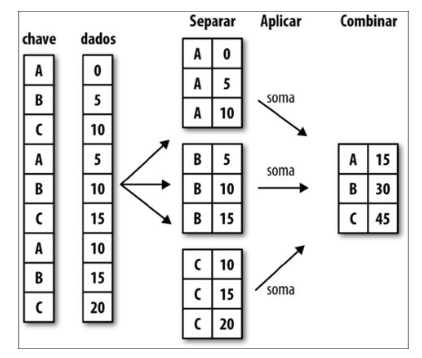

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Exemplo 
#Informações de uma amostra de clientes de uma seguradora que receberam indenização por sinistros parciais

df=pd.DataFrame({"Grau de risco":['B','B','C','C','A','C','C','B','A', 'A','A','A'],
              "Indenização":[320.1,402.1,271.53,418.75,1645.91,744.59,518.02,1941.8,1206.6,615.96,586.10,1000.2],
              "Estado":['SP','RJ','SP','SP','SP','RJ','SP','SP','SP','RJ','SP', 'RJ'],
              "idade": [70,59,47,45,64,72,56,70,30,38, 29, 33],
              "ano":[2012,2011,2010,2012,2010,2010,2011,2011,2012,2012,2010,2011]})
df

,Grau de risco,Indenização,Estado,idade,ano
0,B,320.10,SP,70,2012
1,B,402.10,RJ,59,2011
2,C,271.53,SP,47,2010
3,C,418.75,SP,45,2012
4,A,1645.91,SP,64,2010
5,C,744.59,RJ,72,2010
6,C,518.02,SP,56,2011
7,B,1941.80,SP,70,2011
8,A,1206.60,SP,30,2012
9,A,615.96,RJ,38,2012


## **Separando os dados** 

Usando `grupoby` vamos "separar" os dados segundo uma chave

In [ ]:
df.groupby("Grau de risco") # É um objeto DataFrameGroupBy

In [ ]:
df.groupby("Grau de risco").groups.keys() # mostra as categorias da variável selecionada

dict_keys(['A', 'B', 'C'])

## **Iterando através de grupos**

Para visualizar os dados separados por alguma chave (ou chaves) podemos iterar sobre os atributos do objeto `DataFrameGrupoBy`, isto é, o agrupamento preservará a ordem em que as observações foram classificadas dentro de cada grupo. 

Note que em nosso exemplo os grupos e elementos criados por `groupby()` estão na ordem em que apareceram no DataFrame original df (ver os *index*).

In [ ]:
grouped=df.groupby("Grau de risco")

for chave,grupo in grouped:
  print(chave)
  print(grupo)

A
   Grau de risco  Indenização Estado  idade   ano
4              A      1645.91     SP     64  2010
8              A      1206.60     SP     30  2012
9              A       615.96     RJ     38  2012
10             A       586.10     SP     29  2010
11             A      1000.20     RJ     33  2011
B
  Grau de risco  Indenização Estado  idade   ano
0             B        320.1     SP     70  2012
1             B        402.1     RJ     59  2011
7             B       1941.8     SP     70  2011
C
  Grau de risco  Indenização Estado  idade   ano
2             C       271.53     SP     47  2010
3             C       418.75     SP     45  2012
5             C       744.59     RJ     72  2010
6             C       518.02     SP     56  2011


## **Summarising Groups - Functions** 

Funções como, por exemplo, max(), min(), mean(), quantile() podem ser aplicadas ao objeto `GroupBy` para obter estes resultados para cada grupo. Esta funcionalidade é semelhante às bibliotecas `dplyr` e `plyr` para R.
Por fim, as funções first(), last() são úteis para visualizar os primeiros ou últimos dados.

```
objeto.groupby("chave").function()
```



In [ ]:
df.groupby("Grau de risco").count() # Número de clientes em cada grau de risco

,Indenização,Estado,idade,ano
Grau de risco,,,,
A,5,5,5,5
B,3,3,3,3
C,4,4,4,4


In [ ]:
# Indenizações e idades médias segundo o grau de risco ( faz sentido manter a variável ano (?))
df.groupby("Grau de risco").mean() 

,Indenização,idade,ano
Grau de risco,,,
A,1010.9540,38.800000,2011.000000
B,888.0000,66.333333,2011.333333
C,488.2225,55.000000,2010.750000


## **Selecionando colunas**

Indexar um objeto GroupBy criado a partir de um DataFrame permite criar subconjuntos de colunas para visualização.

```
objeto.groupby("chave")[["var_1",...,"var_n"]].function()
```

Por padrão, as chaves de grupo são classificadas durante a operação de agrupamento. No entanto, você pode passar `sort = False` para alterar a ordem.

In [ ]:
# Só desejamos visualizar as variáveis Indenização e idade
df.groupby("Grau de risco")[["Indenização", "idade"]].mean() 

,Indenização,idade
Grau de risco,,
A,1010.9540,38.800000
B,888.0000,66.333333
C,488.2225,55.000000


In [ ]:
# Total de indenizações segundo o estado
df.groupby("Estado", sort=False)[["Indenização"]].sum() 

,Indenização
Estado,
SP,6908.81
RJ,2762.85


In [ ]:
df.groupby("Grau de risco")[["Indenização", "idade"]].describe() # Estatística de resumo

Indenização                         ... idade            
                    count       mean         std  ...   50%   75%   max
Grau de risco                                     ...                  
A                     5.0  1010.9540  441.045153  ...  33.0  38.0  64.0
B                     3.0   888.0000  913.538083  ...  70.0  70.0  70.0
C                     4.0   488.2225  198.657372  ...  51.5  60.0  72.0

[3 rows x 16 columns]

## **Função `get_group()`**

Usando `get_group()` podemos selecionar uma única categoria após os resultados serem combinados em um objeto.

```
objeto.groupby("chave")[["var_1",...,"var_n"]].get_group().function()
```

In [ ]:
# Informação somente para o grupo "A"
df.groupby("Grau de risco")[["Indenização", "idade"]].get_group("A").describe()

,Indenização,idade
count,5.000000,5.000000
mean,1010.954000,38.800000
std,441.045153,14.515509
min,586.100000,29.000000
25%,615.960000,30.000000
50%,1000.200000,33.000000
75%,1206.600000,38.000000
max,1645.910000,64.000000


Podemos usar a função `get_group()` quando usamos varias chaves para agrupar nossos dados

```
objeto.groupby(["chave 1",..."chave n").get_group(("categoria 1",..., "categoria n"))[["var"]].function()
```




In [ ]:
df.groupby(["Grau de risco", "Estado"])["Indenização"].describe()

count         mean  ...       75%      max
Grau de risco Estado                      ...                   
A             RJ        2.0   808.080000  ...   904.140  1000.20
              SP        3.0  1146.203333  ...  1426.255  1645.91
B             RJ        1.0   402.100000  ...   402.100   402.10
              SP        2.0  1130.950000  ...  1536.375  1941.80
C             RJ        1.0   744.590000  ...   744.590   744.59
              SP        3.0   402.766667  ...   468.385   518.02

[6 rows x 8 columns]

In [ ]:
# Calculamos as estatísticas descritivas para os segurados com grau de risco A e do estado de Sp
df.groupby(["Grau de risco", "Estado"]).get_group(("A","SP"))["Indenização"].describe()

count       3.000000
mean     1146.203333
std       532.480166
min       586.100000
25%       896.350000
50%      1206.600000
75%      1426.255000
max      1645.910000
Name: Indenização, dtype: float64

## **Separando os dados usando mais de uma chave**

É possível separar os dados em grupos com base em mais de uma chave. 

```
objeto.groupby(["chave 1","chave 2",...,"chave k"]).function
```

In [ ]:
df.groupby(["Estado", "Grau de risco"]).mean() 
#df.groupby(["Estado", "Grau de risco"]).min() 
#df.groupby(["Estado", "Grau de risco"]).max() 

Indenização      idade          ano
Estado Grau de risco                                     
RJ     A               808.080000  35.500000  2011.500000
       B               402.100000  59.000000  2011.000000
       C               744.590000  72.000000  2010.000000
SP     A              1146.203333  41.000000  2010.666667
       B              1130.950000  70.000000  2011.500000
       C               402.766667  49.333333  2011.000000

In [ ]:
#Indenizações médias segundo o estado e grau de risco
df.groupby(["Estado", "Grau de risco"])[["Indenização"]].mean() 

Indenização
Estado Grau de risco             
RJ     A               808.080000
       B               402.100000
       C               744.590000
SP     A              1146.203333
       B              1130.950000
       C               402.766667

In [ ]:
# Total de indenizações segundo o estado, ano e grau de risco
df.groupby(["ano","Estado","Grau de risco"])[["Indenização"]].sum() 

Indenização
ano  Estado Grau de risco             
2010 RJ     C                   744.59
     SP     A                  2232.01
            C                   271.53
2011 RJ     A                  1000.20
            B                   402.10
     SP     B                  1941.80
            C                   518.02
2012 RJ     A                   615.96
     SP     A                  1206.60
            B                   320.10
            C                   418.75

## **`Plotting grouped data`**

Podemos usar a função `plot()` para graficar dados agrupados. 

```
Tipo de gráficos (*kind*)

- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
```


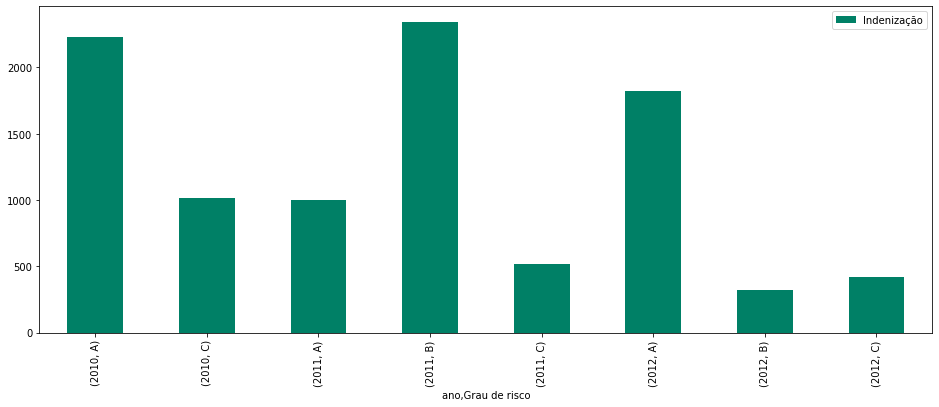

In [ ]:
grupo= df.groupby(["ano","Grau de risco"])[["Indenização"]].sum()
grupo.plot(kind='bar', stacked=True, figsize=[16,6], colormap='summer')

É útil usar as funções: `stack()` ou `unstack()` para empilhar ou desempilhar os dados do dataframe.

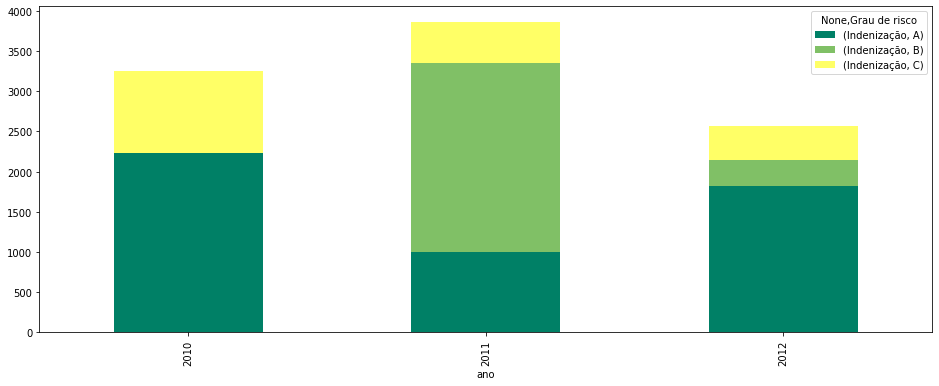

In [ ]:
grupo= df.groupby(["ano","Grau de risco"])[["Indenização"]].sum().unstack()
grupo.plot(kind='bar', stacked=True, figsize=[16,6], colormap='summer') #O que faz stacked?

## **`GroupBy dropna`**

Por padrão, os valores NA são excluídos das chaves de grupo durante a operação groupby. No entanto, caso você queira incluir valores de NA nas chaves de grupo, pode passar `dropna = False` para obtê-lo.

In [ ]:
# Exemplo 
#Informações de uma amostra de clientes de uma seguradora que receberam indenização por sinistros parciais

df=pd.DataFrame({"Grau de risco":['B','B','C','C',None,'C','C','B','A', 'A'],
              "Indenização":[271.53,418.75,1645.91,744.59,518.02,1941.8,1206.6,615.96,586.10,1000.2],
              "Estado":['SP','RJ','SP','SP','SP','RJ','SP','SP','SP','RJ'],
              "idade": [70,59,47,45,64,72,56,70,30,38],
              "ano":[2010,2011,2010,2012,2010,2010,2011,2011,2012,2012]})

df.groupby("Grau de risco", dropna=False)[["Indenização"]].count()


,Indenização
Grau de risco,
A,2
B,3
C,4
NaN,1


## **Funções de agregação**

Uma vez que o objeto `GroupBy` foi criado você também pode passar uma lista ou dicionário de funções para aplicá-las ao mesmo tempo usando a função `agg()`

```
objeto.groupby().agg([function_1(),...,function_n()])
```
Podemos usar `numpy` para usar funções desta *library*, por exemplo, sum, mean, std.



In [ ]:
df.groupby("Grau de risco").agg([np.sum, np.mean, np.std])

Indenização                           ...   ano                       
                      sum         mean         std  ...   sum         mean       std
Grau de risco                                       ...                             
A                 1586.30   793.150000  292.812918  ...  4024  2012.000000  0.000000
B                 1306.24   435.413333  172.818564  ...  6032  2010.666667  0.577350
C                 5538.90  1384.725000  522.829320  ...  8043  2010.750000  0.957427

[3 rows x 9 columns]

Podemos estar interessados em selecionar uma determinada coluna (ou colunas) e aplicar as funções. É muito útil quando temos muitas variáveis em nossa base de dados.

In [ ]:
df.groupby("Grau de risco")[["Indenização"]].agg([np.sum, np.mean, np.std])


Indenização                         
                      sum         mean         std
Grau de risco                                     
A                 1586.30   793.150000  292.812918
B                 1306.24   435.413333  172.818564
C                 5538.90  1384.725000  522.829320

In [ ]:
# Selecionado uma linha
df.groupby("Grau de risco")[["Indenização"]].get_group("A").agg([np.sum, np.mean, np.std])

,Indenização
sum,1586.300000
mean,793.150000
std,292.812918


Podemos aplicar diferentes funções para cada variável (coluna) usando um dicionário.

```
objeto. groupby().agg({"chave1": function,..., "chaven": function})
```



In [ ]:
df.groupby("Grau de risco").agg({"Indenização": np.sum,"idade":np.mean,"ano":len})

,Indenização,idade,ano
Grau de risco,,,
A,1586.30,34.000000,2
B,1306.24,66.333333,3
C,5538.90,55.000000,4


Melhorando o código anterior!

In [ ]:
df.groupby("Grau de risco").agg(
    **{
    "Indenização(soma)": pd.NamedAgg(column="Indenização",aggfunc=sum),
    "Idade(média)": pd.NamedAgg(column="idade",aggfunc=np.mean),
    "Ano(contagem)": pd.NamedAgg(column="ano",aggfunc=len)})

,Indenização(soma),Idade(média),Ano(contagem)
Grau de risco,,,
A,1586.30,34.000000,2
B,1306.24,66.333333,3
C,5538.90,55.000000,4


#**Exercícios**

In [ ]:
import pandas as pd

Para os seguintes exercícios considere a base de dados dos salários de uma companhia.

*link*= "http://www.orlandoalbarracin.com.br/phyton/data2.csv"


In [ ]:
import pandas as pd
link= "http://www.orlandoalbarracin.com.br/phyton/data2.csv"
df1=pd.read_csv(link)
df1

,id,Setor,Sexo,Grau_instrução,Idade,Anos_Experiencia,Estado,salario
0,1,Operacion,Masculino,Superior Completo,54,12,SP,2708.410161
1,2,RH,Masculino,Doutorado,52,12,SP,8321.204000
2,3,RH,Masculino,Mestrado,54,12,RJ,7588.139000
3,4,Financeiro,Feminino,Mestrado,32,9,BH,6512.599657
4,5,RH,Masculino,Superior Incompleto,34,8,BH,3125.765000
...,...,...,...,...,...,...,...,...
1515,1516,Administrativo,Feminino,Superior Incompleto,39,15,BH,2171.749259
1516,1517,RH,Masculino,Superior Completo,34,8,SP,6603.683000
1517,1518,Operacion,Masculino,Superior Completo,37,13,SP,4479.974250
1518,1519,Operacion,Feminino,Superior Completo,57,10,BH,6923.622400


# 1. 
Agrupe os dados segundo as variáveis Sexo, Setor e Grau de instrução, depois verifique se é possível afirmar que 25% dos salários das mulheres do setor Administrativo com mestrado são maiores que 11.000 reais?

# 2.
Determine a idade mediana dos empregados do sexo masculino que trabalham no setor RH e que têm ensino superior incompleto.

# 3. 
Calcule a diferença entre os salários médios das empregadas do setor Financeiro com doutorado e mestrado.

# 4. 
Apresente um *DataFrame* em que apareça os anos de experiencia mínimo, idade média e salário máximo dos empregados(as) da companhia segundo o Estado em que trabalham. Aponte um dado interessante

# 5.
Apresente em um *DataFrame* o valor mínimo, média, desvio padrão, mediana e máximo dos salários e anos de experiencia dos empleados(as) de São Paulo.

# 6.  
Apresente o número de empregrados, por setor, que apresentam salários inferiores a 10.000 reais.

```
Dica: Crie uma função para determinar os salários inferiores a 10.000 reales.
```



# 7.  
Calcule o salário médio de empregrados segundo o Estado e Setor em que trabalham e que têm salários superiores  a 3.500 reais


```
Dica: Crie uma função para selecionar os salários superiores a 3.500 e calcule a média. 
```

